In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import pylab as pl
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("../data/ChurnData.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [30]:
df.sample(3)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
107,7.0,27.0,3.0,39.0,3.0,2.0,0.0,0.0,0.0,3.55,0.00,0.0,0.00,0.00,19.70,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.267,3.240,3.664,1.0,1.0
177,43.0,29.0,4.0,33.0,1.0,13.0,0.0,1.0,1.0,22.05,18.75,0.0,7.50,24.95,1042.95,830.75,345.0,0.0,0.0,0.0,1.0,1.0,0.0,3.093,2.931,3.497,3.0,0.0
174,3.0,32.0,4.0,58.0,2.0,11.0,1.0,1.0,1.0,2.75,15.75,29.5,9.25,28.55,5.70,49.65,15.0,1.0,1.0,0.0,0.0,0.0,1.0,1.012,2.757,4.060,4.0,1.0


<Axes: >

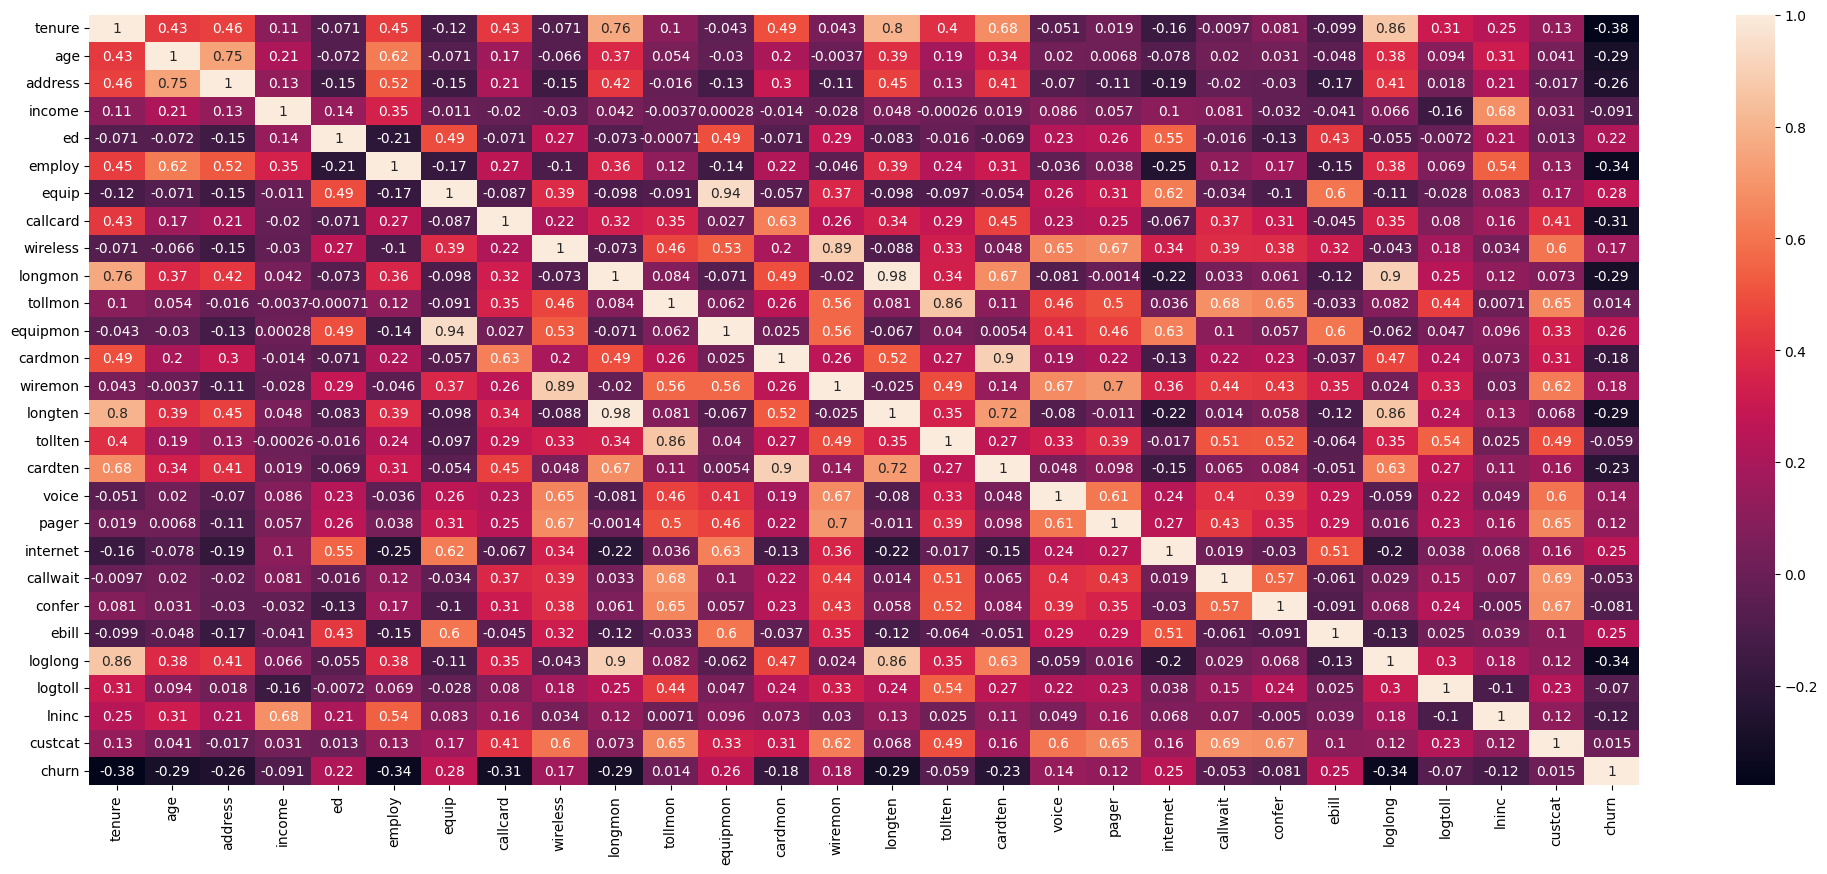

In [62]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True)

In [63]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [8]:
df.shape

(200, 28)

In [71]:
y = df["churn"] 
X = df.drop("churn", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5) 

In [75]:
dt = LogisticRegression(solver='liblinear') 
dt.fit(X_train, y_train) 
pred = dt.predict(X_test) 
print("Logistic Regression accuracy:", accuracy_score(y_test, pred)) 
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

Logistic Regression accuracy: 0.65
              precision    recall  f1-score   support

         0.0       0.90      0.60      0.72        30
         1.0       0.40      0.80      0.53        10

    accuracy                           0.65        40
   macro avg       0.65      0.70      0.63        40
weighted avg       0.78      0.65      0.67        40

[[18 12]
 [ 2  8]]


<Axes: >

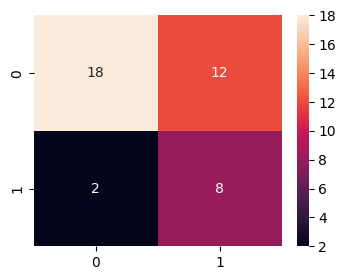

In [73]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, pred), annot=True)